In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
from pandas.io.json import json_normalize

## Gather

In [2]:
df_impred = pd.read_csv('image_predictions.tsv', sep = '\t')

In [3]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [2]:
df1 = df_impred.copy()

In [3]:
df2 = df_archive.copy()

#### Using twitter API

In [4]:
# # load the data Tweeter API

# CONSUMER_KEY = "MY_KEY"
# CONSUMER_SECRET = "MY_SECRET_KEX"
# ACCESS_TOKEN = "MY_TOKEN"
# ACCESS_TOKEN_SECRET = "MY_SECRET_TOKEN"

# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# api = tweepy.API(auth_handler = auth,
#                  parser = tweepy.parsers.JSONParser(),
#                  wait_on_rate_limit = True,
#                  wait_on_rate_limit_notify = True)

In [5]:
df_tweet_json = pd.read_json('tweet-json', lines = True)

In [ ]:
df3 = df_tweet_json.copy()

## Assess

#### Visually

In [72]:
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [6]:
print(df1.shape)
df1.head()

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [73]:
print(df2.shape)
df2.head()

(2356, 11)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


In [74]:
print(df3.shape)
df3.head()

(2354, 15)


,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",False,8853,39467,False,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","{'id

#### Programatically

In [7]:
df1.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [51]:
df.p1.value_counts()

golden_retriever      146
Labrador_retriever     97
Pembroke               88
Chihuahua              83
pug                    57
                     ... 
skunk                   1
military_uniform        1
cheeseburger            1
limousine               1
barbell                 1
Name: p1, Length: 378, dtype: int64

In [55]:
df.p1.nunique()

378

In [58]:
df.p1.unique()[:30]

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'three-toed_sloth',
       'ox', 'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel'], dtype=object)

In [52]:
df.p2.value_counts()

Labrador_retriever      104
golden_retriever         90
Cardigan                 73
Chihuahua                42
Pomeranian               42
                       ... 
lawn_mower                1
Bernese_mountain_dog      1
snowmobile                1
platypus                  1
waffle_iron               1
Name: p2, Length: 402, dtype: int64

In [59]:
df.p2.nunique()

402

In [60]:
df.p2.unique()[:30]

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'otter',
       'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier'], dtype=object)

In [53]:
df.p3.value_counts()

Labrador_retriever    77
Chihuahua             58
golden_retriever      47
Eskimo_dog            37
kelpie                35
                      ..
rapeseed               1
hatchet                1
barbell                1
cheetah                1
screw                  1
Name: p3, Length: 406, dtype: int64

In [61]:
df.p3.nunique()

406

In [62]:
df.p3.unique()[:30]

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'great_grey_owl',
       'groenendael', 'Eskimo_dog', 'hamster', 'briard', 'papillon',
       'flat-coated_retriever', 'gar', 'Chihuahua', 'Shih-Tzu'],
      dtype=object)

<AxesSubplot:xlabel='p1_conf'>

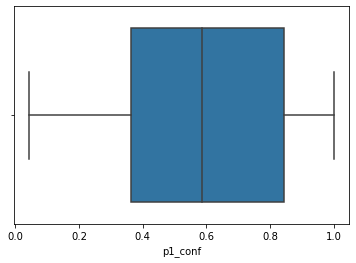

In [63]:
sns.boxplot(df.p1_conf)

<AxesSubplot:xlabel='p2_conf'>

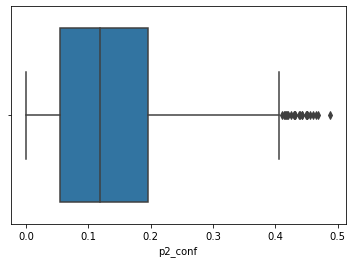

In [64]:
sns.boxplot(df.p2_conf)

<AxesSubplot:xlabel='p3_conf'>

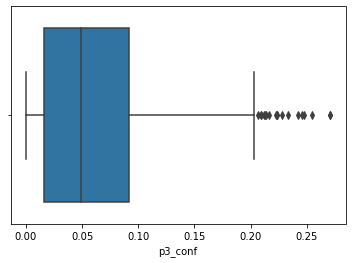

In [65]:
sns.boxplot(df.p3_conf)

In [32]:
c = sns.color_palette()[2]

<AxesSubplot:xlabel='p1_dog', ylabel='count'>

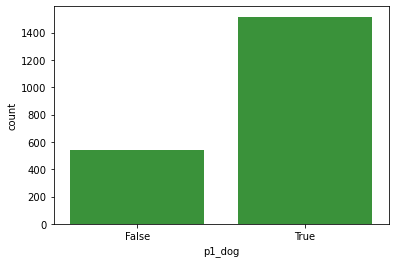

In [70]:
sns.countplot(df.p1_dog, color = c)

<AxesSubplot:xlabel='p2_dog', ylabel='count'>

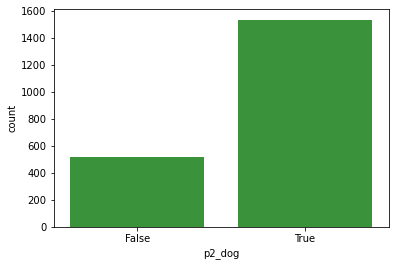

In [69]:
sns.countplot(df.p2_dog, color = c)

<AxesSubplot:xlabel='p3_dog', ylabel='count'>

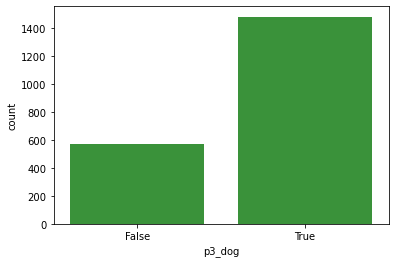

In [71]:
sns.countplot(df.p3_dog, color = c)

In [77]:
df3.is_quote_status.value_counts()

False    2323
True     31  
Name: is_quote_status, dtype: int64

In [82]:
df3.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [8]:
df1.duplicated().sum()

0

In [9]:
print(df2.shape)
df2.head()

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df2.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## Clean

In [11]:
# dropping these columns with too much missing values
df2.dropna(axis = 1, inplace = True)

In [12]:
print(df3.shape)
df3.head()

(2354, 31)


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [13]:
df3.isna().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [14]:
# dropping these columns with too much missing values
df3.dropna(axis = 1, inplace = True)

In [15]:
df3.rename(columns = {'id' : 'tweet_id'}, inplace= True)

### Tidiness issues

##### Issue 1
###### Define:
The dataframes should be merged

###### Code

In [16]:
df = pd.merge(df1, pd.merge(df2,df3))

###### Test

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   int64              
 1   jpg_url             2073 non-null   object             
 2   img_num             2073 non-null   int64              
 3   p1                  2073 non-null   object             
 4   p1_conf             2073 non-null   float64            
 5   p1_dog              2073 non-null   bool               
 6   p2                  2073 non-null   object             
 7   p2_conf             2073 non-null   float64            
 8   p2_dog              2073 non-null   bool               
 9   p3                  2073 non-null   object             
 10  p3_conf             2073 non-null   float64            
 11  p3_dog              2073 non-null   bool               
 12  timestamp           2073 non-null 

##### Issue 2
###### Define
Dog stage columns should be merged to one column

###### Code

In [23]:
# for column in df.columns:
#     df[column].replace('None', np.nan, inplace = True)

In [24]:
# merging all columns indicating dog stage into 1 column
df.doggo.replace('None', 0, inplace = True)
df.floofer.replace('None', 0, inplace = True)
df.pupper.replace('None', 0, inplace = True)
df.puppo.replace('None', 0, inplace = True)
df.doggo.replace('doggo', 1, inplace = True)
df.floofer.replace('floofer', 2, inplace = True)
df.pupper.replace('pupper', 4, inplace = True)
df.puppo.replace('puppo', 8, inplace = True)

In [25]:
df['stage'] = df.doggo + df.floofer + df.pupper + df.puppo

In [26]:
df.stage.value_counts()

0    1735
4     210
1      67
8      23
5      11
2       7
9       1
3       1
Name: stage, dtype: int64

In [27]:
df.stage.replace([1, 2, 4, 8, 3, 5, 9, 0], ['doggo', 'floofer', 'pupper', 'puppo', 'multi', 'multi', 'multi', np.nan], inplace = True)

In [28]:
df.stage.value_counts()

pupper     210
doggo       67
puppo       23
multi       13
floofer      7
Name: stage, dtype: int64

In [29]:
df.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'rating_numerator',
       'doggo', 'floofer', 'pupper', 'puppo', 'created_at', 'retweet_count',
       'favorite_count', 'year', 'month', 'day', 'hour', 'stage'],
      dtype='object')

In [30]:
df.drop(['doggo', 'floofer', 'pupper', 'puppo', 'timestamp'], axis = 1, inplace = True)

###### Test

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2055 non-null   int64              
 1   jpg_url           2055 non-null   object             
 2   p1                2055 non-null   object             
 3   p1_conf           2055 non-null   float64            
 4   p1_dog            2055 non-null   bool               
 5   p2                2055 non-null   object             
 6   p2_conf           2055 non-null   float64            
 7   p2_dog            2055 non-null   bool               
 8   p3                2055 non-null   object             
 9   p3_conf           2055 non-null   float64            
 10  p3_dog            2055 non-null   bool               
 11  rating_numerator  2055 non-null   int64              
 12  created_at        2055 non-null   datetime64[ns, UTC]
 13  ret

#### Quality Issues

#### Issue 1

###### Define
'lang', 'retweeted', 'favorited' columns are unimportarnt. We need to drop them.

###### Code

In [18]:
# dropping unimportant columns
df.drop(['lang', 'retweeted', 'favorited'], axis = 1, inplace = True)

###### Test

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2055 non-null   int64              
 1   jpg_url           2055 non-null   object             
 2   p1                2055 non-null   object             
 3   p1_conf           2055 non-null   float64            
 4   p1_dog            2055 non-null   bool               
 5   p2                2055 non-null   object             
 6   p2_conf           2055 non-null   float64            
 7   p2_dog            2055 non-null   bool               
 8   p3                2055 non-null   object             
 9   p3_conf           2055 non-null   float64            
 10  p3_dog            2055 non-null   bool               
 11  timestamp         2055 non-null   object             
 12  rating_numerator  2055 non-null   int64              
 13  dog

#### Issue 2

###### Define
'is_quote_status', 'user', 'entities' columns are unimportarnt. We need to drop them.

###### Code

In [18]:
# dropping unimportant columns
df.drop(['is_quote_status', 'user', 'entities'], axis = 1, inplace = True)

###### Test

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2055 non-null   int64              
 1   jpg_url           2055 non-null   object             
 2   p1                2055 non-null   object             
 3   p1_conf           2055 non-null   float64            
 4   p1_dog            2055 non-null   bool               
 5   p2                2055 non-null   object             
 6   p2_conf           2055 non-null   float64            
 7   p2_dog            2055 non-null   bool               
 8   p3                2055 non-null   object             
 9   p3_conf           2055 non-null   float64            
 10  p3_dog            2055 non-null   bool               
 11  timestamp         2055 non-null   object             
 12  rating_numerator  2055 non-null   int64              
 13  dog

#### Issue 3

###### Define
'display_text_range', 'truncated', 'id_str', 'full_text' columns are unimportarnt. We need to drop them.

###### Code

In [18]:
# dropping unimportant columns
df.drop(['display_text_range', 'truncated', 'id_str', 'full_text'], axis = 1, inplace = True)

###### Test

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2055 non-null   int64              
 1   jpg_url           2055 non-null   object             
 2   p1                2055 non-null   object             
 3   p1_conf           2055 non-null   float64            
 4   p1_dog            2055 non-null   bool               
 5   p2                2055 non-null   object             
 6   p2_conf           2055 non-null   float64            
 7   p2_dog            2055 non-null   bool               
 8   p3                2055 non-null   object             
 9   p3_conf           2055 non-null   float64            
 10  p3_dog            2055 non-null   bool               
 11  timestamp         2055 non-null   object             
 12  rating_numerator  2055 non-null   int64              
 13  dog

#### Issue 4

###### Define
'name', 'img_num', 'source', 'text' columns are unimportarnt. We need to drop them.

###### Code

In [18]:
# dropping unimportant columns
df.drop(['name', 'img_num', 'source', 'text'], axis = 1, inplace = True)

###### Test

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2055 non-null   int64              
 1   jpg_url           2055 non-null   object             
 2   p1                2055 non-null   object             
 3   p1_conf           2055 non-null   float64            
 4   p1_dog            2055 non-null   bool               
 5   p2                2055 non-null   object             
 6   p2_conf           2055 non-null   float64            
 7   p2_dog            2055 non-null   bool               
 8   p3                2055 non-null   object             
 9   p3_conf           2055 non-null   float64            
 10  p3_dog            2055 non-null   bool               
 11  timestamp         2055 non-null   object             
 12  rating_numerator  2055 non-null   int64              
 13  dog

##### Issue 5

###### Define
There are records with denominator different than 10. We should drop them

###### Code

In [19]:
# dropping values with denominator != 10
df.drop(df[df.rating_denominator != 10].index, inplace = True)

###### Test

In [ ]:
(df.rating_denominator != 10).sum()

##### Issue 6

###### Define
'rating_denominator' now is all 10s. it is not useful. We should drop it

###### Code

In [20]:
df.drop('rating_denominator', axis = 1, inplace = True)

###### Test

In [ ]:
df.columns

##### Issue 7

###### Define
We should extract year, month, day and hour information from the 'created_at' column.

###### Code

In [21]:
# create year, month, day and hour columns
df['year'] = df.created_at.dt.year
df['month'] = df.created_at.dt.month_name()
df['day'] = df.created_at.dt.day_name()
df['hour'] = df.created_at.dt.hour

###### Test

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2055 non-null   int64              
 1   jpg_url           2055 non-null   object             
 2   p1                2055 non-null   object             
 3   p1_conf           2055 non-null   float64            
 4   p1_dog            2055 non-null   bool               
 5   p2                2055 non-null   object             
 6   p2_conf           2055 non-null   float64            
 7   p2_dog            2055 non-null   bool               
 8   p3                2055 non-null   object             
 9   p3_conf           2055 non-null   float64            
 10  p3_dog            2055 non-null   bool               
 11  timestamp         2055 non-null   object             
 12  rating_numerator  2055 non-null   int64              
 13  dog

##### Issue 8

###### Define
'jpg_url' column isn't useful for our analysis. Let's drop it.

In [ ]:
df.drop('jpg_url',axis= 1, inplace= True)

###### Test

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2055 non-null   int64              
 1   jpg_url           2055 non-null   object             
 2   p1                2055 non-null   object             
 3   p1_conf           2055 non-null   float64            
 4   p1_dog            2055 non-null   bool               
 5   p2                2055 non-null   object             
 6   p2_conf           2055 non-null   float64            
 7   p2_dog            2055 non-null   bool               
 8   p3                2055 non-null   object             
 9   p3_conf           2055 non-null   float64            
 10  p3_dog            2055 non-null   bool               
 11  timestamp         2055 non-null   object             
 12  rating_numerator  2055 non-null   int64              
 13  dog

In [31]:
df[['p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog']]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...
2068,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2069,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2070,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2071,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Analyze

Text(0, 0.5, 'Dog Type')

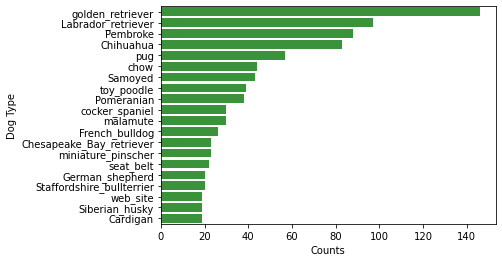

In [33]:
sns.countplot(y = df['p1'], color = c, order=df['p1'].value_counts().index[0:20])
plt.xlabel('Counts')
plt.ylabel('Dog Type')

Text(0, 0.5, 'Dog Type')

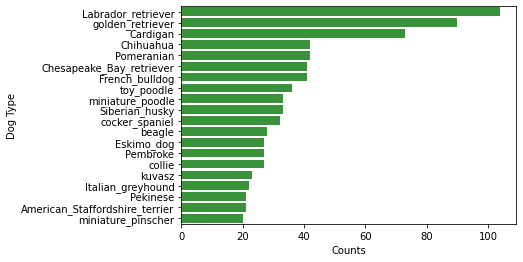

In [34]:
sns.countplot(y = df['p2'], color = c, order=df['p2'].value_counts().index[0:20])
plt.xlabel('Counts')
plt.ylabel('Dog Type')

Text(0, 0.5, 'Dog Type')

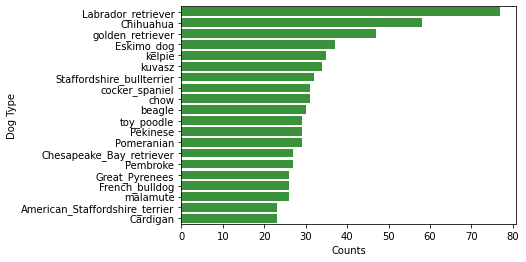

In [35]:
sns.countplot(y = df['p3'], color = c, order=df['p3'].value_counts().index[0:20])
plt.xlabel('Counts')
plt.ylabel('Dog Type')

<AxesSubplot:>

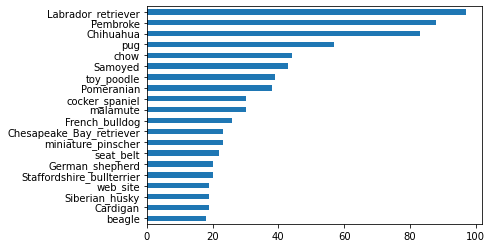

In [36]:
df['p1'].value_counts()[20:0:-1].plot(kind = 'barh')

<AxesSubplot:xlabel='count', ylabel='hour'>

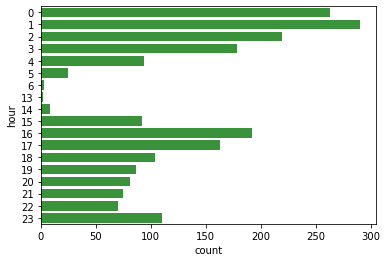

In [37]:
sns.countplot(data = df, y = 'hour',color = c)

<AxesSubplot:xlabel='count', ylabel='day'>

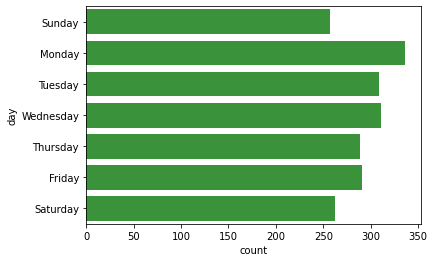

In [38]:
sns.countplot(data = df, y = 'day',color = c)

<AxesSubplot:xlabel='count', ylabel='year'>

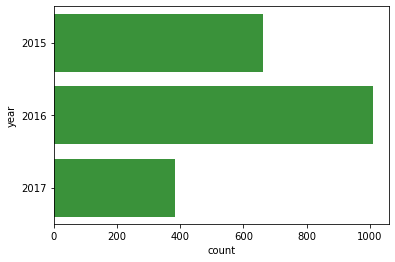

In [39]:
sns.countplot(data = df, y = 'year',color = c)

<AxesSubplot:xlabel='stage', ylabel='count'>

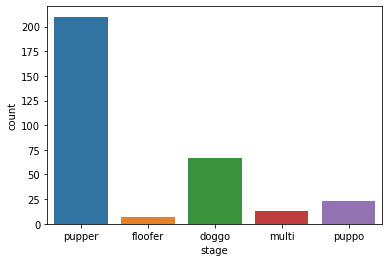

In [40]:
sns.countplot(df.stage)

In [41]:
df.isna().sum()

tweet_id               0
jpg_url                0
p1                     0
p1_conf                0
p1_dog                 0
p2                     0
p2_conf                0
p2_dog                 0
p3                     0
p3_conf                0
p3_dog                 0
rating_numerator       0
created_at             0
retweet_count          0
favorite_count         0
year                   0
month                  0
day                    0
hour                   0
stage               1735
dtype: int64

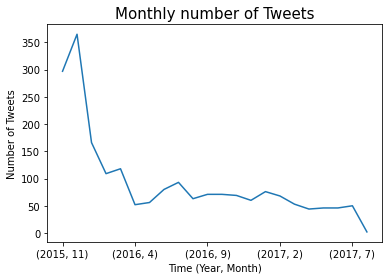

In [50]:
selected_data = df['tweet_id'].groupby([df['created_at'].dt.year, df['created_at'].dt.month]).count()
selected_data.plot(kind = 'line')
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time');

In [42]:
((df.p1_dog == False) & (df.p2_dog == False) & (df.p3_dog == False)).sum()

322

In [43]:
((df.p1_dog == False)).sum()

539

In [44]:
df.to_csv('twitter_archive_master.csv', index = False)